>>># Old BIkes price prediction project 🛵

### importing library

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Used_Bikes.csv')
df.head()       

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df.shape

(32648, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [7]:
df['brand'].value_counts()

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: count, dtype: int64

In [8]:
df['owner'].value_counts()

owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: count, dtype: int64

### check the missing value

In [9]:
df.isnull().sum().sum()       # there is no missing value

0

In [10]:
df['brand'].nunique()         # total 23 brand

23

In [11]:
df['brand'].unique()
# all are unique brands available in my dataset

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [12]:
df['bike_name'].nunique()
# Total no. unique bikes available in my dataset

471

In [13]:
df[df['brand']=='Hero'].shape     
# total Hero brand bike

(6368, 8)

## KTM bike analyses

In [14]:
ktm = df[df['brand']=='KTM']
ktm.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
33,KTM RC 390cc,180000.0,Pune,17700.0,First Owner,4.0,390.0,KTM
35,KTM Duke 200cc,70000.0,Nashik,100000.0,Second Owner,8.0,200.0,KTM
39,KTM RC 200cc ABS,179000.0,Bangalore,3400.0,First Owner,2.0,200.0,KTM
65,KTM Duke 200cc,94700.0,Baripara,32700.0,First Owner,4.0,200.0,KTM
83,KTM Duke 250cc,130000.0,Gandhidham,17500.0,Second Owner,4.0,250.0,KTM


In [15]:
ktm.shape[0]          # total KTM bike

1077

In [16]:
ktm['bike_name'].nunique()    # 10 unique KTM bikes

10

In [17]:
ktm['bike_name'].unique()
# all are ktm bike available in our dataset

array(['KTM RC 390cc', 'KTM Duke 200cc', 'KTM RC 200cc ABS',
       'KTM Duke 250cc', 'KTM Duke 390cc', 'KTM RC 200cc',
       'KTM Duke 125cc', 'KTM Duke 250cc ABS', 'KTM RC 125CC',
       'KTM Duke 200cc ABS'], dtype=object)

In [18]:
print(f"maximum price of ktm bike :- {ktm['price'].max()}")

maximum price of ktm bike :- 860000.0


In [19]:
ktm['owner'].value_counts()
# availibility of ktm bike

owner
First Owner     1040
Second Owner      29
Third Owner        8
Name: count, dtype: int64

# cd delux bike analysis

In [20]:
hero = df[df['brand']=='Hero']
hero.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
7,Hero Splendor Plus Self Alloy 100cc,45000.0,Delhi,12645.0,First Owner,3.0,100.0,Hero
22,Hero Splendor iSmart Plus IBS 110cc,46500.0,Delhi,3500.0,First Owner,2.0,110.0,Hero
26,Hero Super Splendor 125cc,20000.0,Ahmedabad,29305.0,First Owner,16.0,125.0,Hero
48,Hero Hunk 150cc,37000.0,Mumbai,10800.0,First Owner,8.0,150.0,Hero
66,Hero CD Deluxe 100cc,12200.0,Agra,46643.0,First Owner,14.0,100.0,Hero


In [21]:
print(f"Total no. of unique bike of hero :- {hero['bike_name'].nunique()}")

Total no. of unique bike of hero :- 74


In [22]:
cd_delux = hero[hero['bike_name'].str.contains('CD')]
cd_delux.head()
#filtering data of cd delux bike of hero

,bike_name,price,city,kms_driven,owner,age,power,brand
66,Hero CD Deluxe 100cc,12200.0,Agra,46643.0,First Owner,14.0,100.0,Hero
679,Hero CD Dawn 100cc,16000.0,Gurgaon,50000.0,First Owner,9.0,100.0,Hero
707,Hero CD Deluxe 100cc,29500.0,Kota,21017.0,First Owner,9.0,100.0,Hero
894,Hero CD Deluxe 100cc,29500.0,Kota,21017.0,First Owner,9.0,100.0,Hero
1137,Hero CD Deluxe 100cc,15200.0,Jhansi,36000.0,Second Owner,12.0,100.0,Hero


In [23]:
print(f"Total no. of cd delux unique bik :- {cd_delux.shape[0]}" )          # 706 CD delux bike

Total no. of cd delux unique bik :- 706


In [24]:
print(f"minimum price of cd delux bike :- {cd_delux['price'].min()}")      # minimum price of cd delux bike

minimum price of cd delux bike :- 10000.0


In [25]:
hero[hero['bike_name'].str.contains('CD')]['price'].max()         # maximum price of CD Delux

37500.0

In [26]:
df['city'].value_counts().keys().shape[0]          # 443 city record available 

443

### analyse the data with groupby properties

In [28]:
df.head(2)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


In [29]:
grouped=df.groupby(by='city')       # grouped the data by city columns

In [30]:
grouped.get_group('Ahmedabad')

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
26,Hero Super Splendor 125cc,20000.0,Ahmedabad,29305.0,First Owner,16.0,125.0,Hero
54,Bajaj Avenger 220cc,40000.0,Ahmedabad,64000.0,First Owner,7.0,220.0,Bajaj
56,Honda Dream Yuga 110cc,34500.0,Ahmedabad,17056.0,First Owner,5.0,110.0,Honda
168,Royal Enfield Classic 350cc,107000.0,Ahmedabad,17000.0,First Owner,4.0,350.0,Royal Enfield
...,...,...,...,...,...,...,...,...
32540,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki
32559,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki
32578,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki
32597,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki


In [31]:
f"bikes available in Delhi :- {grouped.get_group('Delhi').shape[0]}"          

'bikes available in Delhi :- 7318'

In [32]:
grouped.get_group('Delhi')[['age']].head()       # get a particular column from the grouped data

,age
1,4.0
2,8.0
5,6.0
6,3.0
7,3.0


In [33]:
grouped.get_group('Delhi')[['age']].max()        #maximum old bike in delhi

age    63.0
dtype: float64

In [34]:
grouped.get_group('Delhi')[['age']].min()        #minimum old bike in delhi

age    1.0
dtype: float64

In [35]:
df[(df['city']=='Delhi') & (df['age']==1)]         #[['bike_name','brand']]

,bike_name,price,city,kms_driven,owner,age,power,brand
7235,Honda Livo 110cc,60000.0,Delhi,74.0,First Owner,1.0,110.0,Honda


In [36]:
grouped.get_group('Delhi')['brand'].value_counts().keys()         # all brand available in Delhi 

Index(['Bajaj', 'Hero', 'Royal Enfield', 'Yamaha', 'TVS', 'Honda', 'Suzuki',
       'KTM', 'Harley-Davidson', 'Hyosung', 'Mahindra', 'Triumph', 'Benelli',
       'Kawasaki', 'Ducati', 'BMW', 'Rajdoot', 'MV'],
      dtype='object', name='brand')

In [37]:
grouped['owner'].value_counts()['Delhi']           # mostly first handed used bikes availabel in delhi

owner
First Owner             6516
Second Owner             787
Third Owner               13
Fourth Owner Or More       2
Name: count, dtype: int64

## divide the data based on the data types

In [38]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

### Dividing Data  into 2 parts based on data type

In [41]:
catigorical_data = df.select_dtypes(include='O')
catigorical_data.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [42]:
numerical_data = df.select_dtypes(exclude='O')
numerical_data.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [43]:
numerical_data.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [44]:
catigorical_data.describe()

,bike_name,city,owner,brand
count,32648,32648,32648,32648
unique,471,443,4,23
top,Bajaj Pulsar 150cc,Delhi,First Owner,Bajaj
freq,2776,7318,29964,11213


In [45]:
# to remove the "bike_name" feature
df=df.drop('bike_name',axis=1)
df.head(2)

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


## Data Visualization

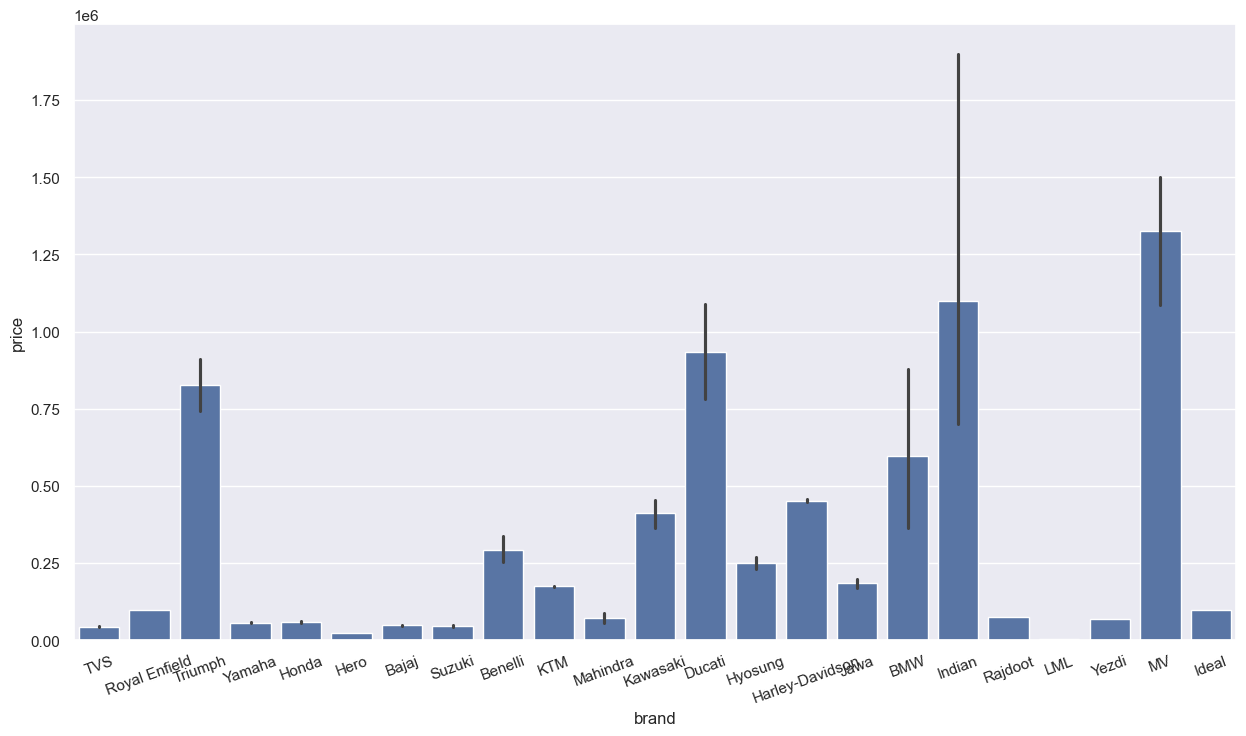

In [46]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation=20)
plt.show()

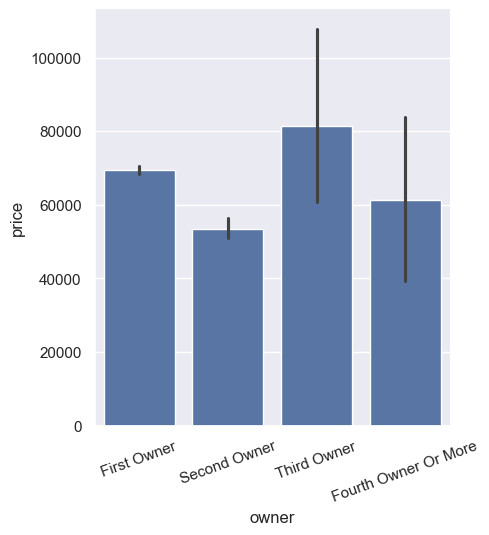

In [47]:
sns.catplot(x='owner',y='price',kind='bar',data=df)   
plt.xticks(rotation=20)
plt.show()

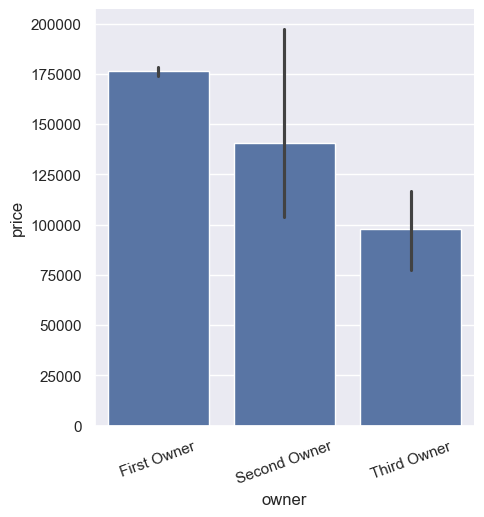

In [48]:
sns.catplot(x='owner',y='price',kind='bar',data=ktm)   # for ktm bike
plt.xticks(rotation=20)
plt.show()

<Axes: xlabel='owner', ylabel='count'>

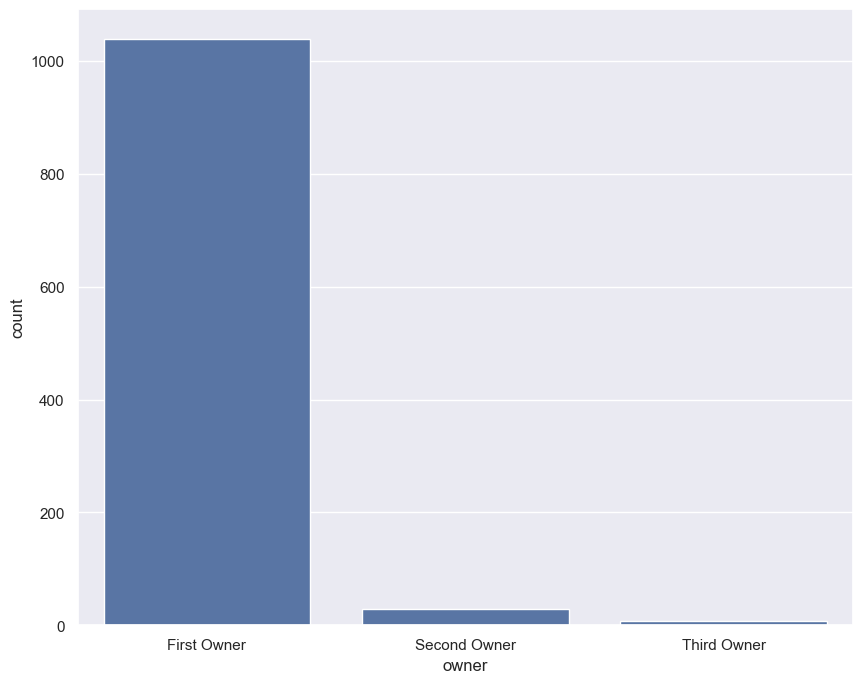

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x='owner',data=df.query("brand=='KTM'"))

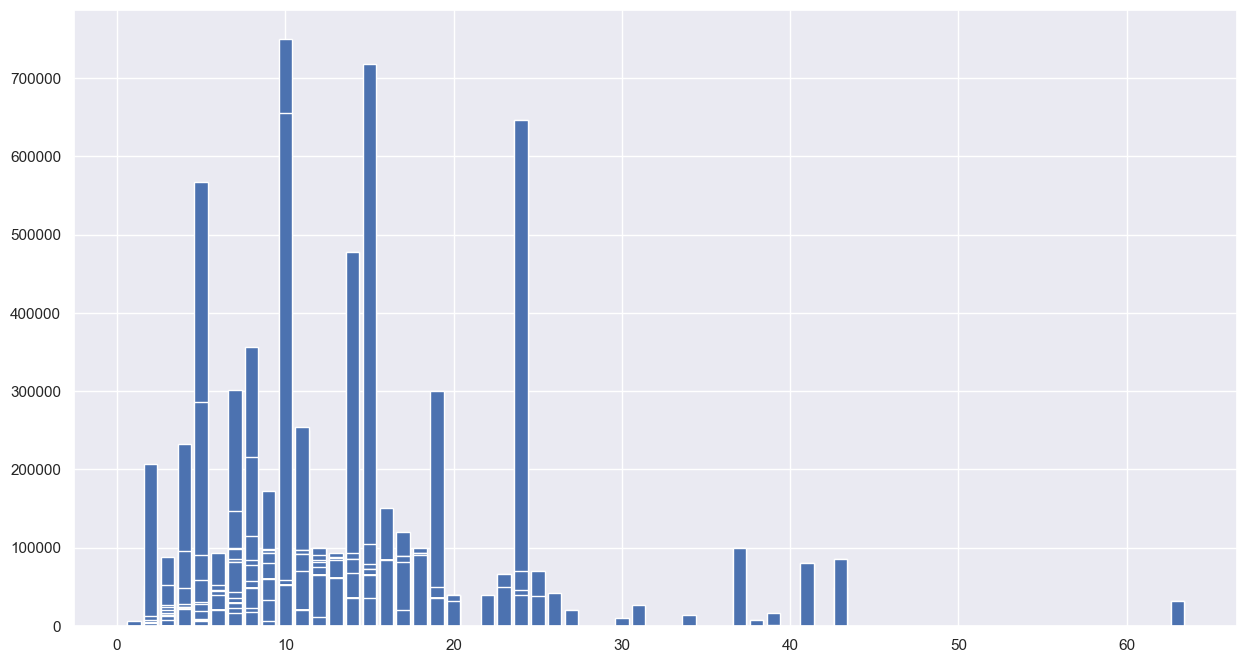

In [50]:
# sns.set(rc={'figure.figsize':(18,10)})
plt.bar(x=df['age'],height=df['kms_driven'])
plt.show()

In [55]:
df[(df['age']>=44)&(df['age']<=60)]      # there is no record in between this range

,price,city,kms_driven,owner,age,power,brand


In [52]:
numerical_data.columns

Index(['price', 'kms_driven', 'age', 'power'], dtype='object')

<Axes: ylabel='price'>

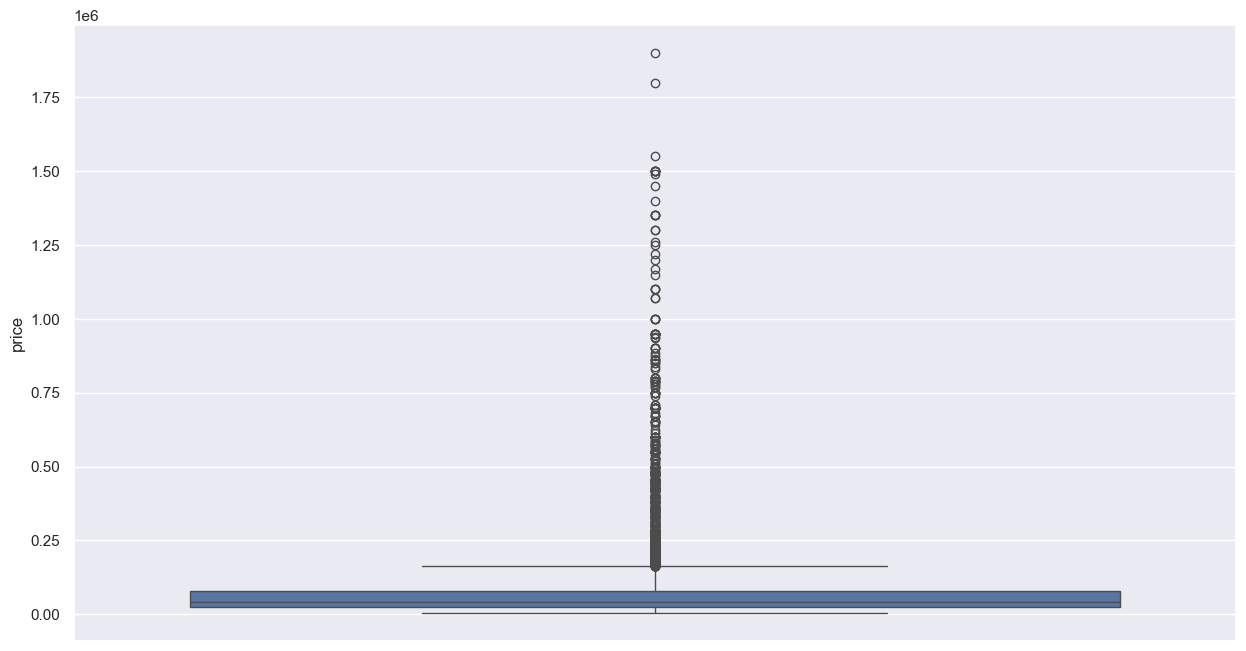

In [53]:
sns.boxplot(df['price'])

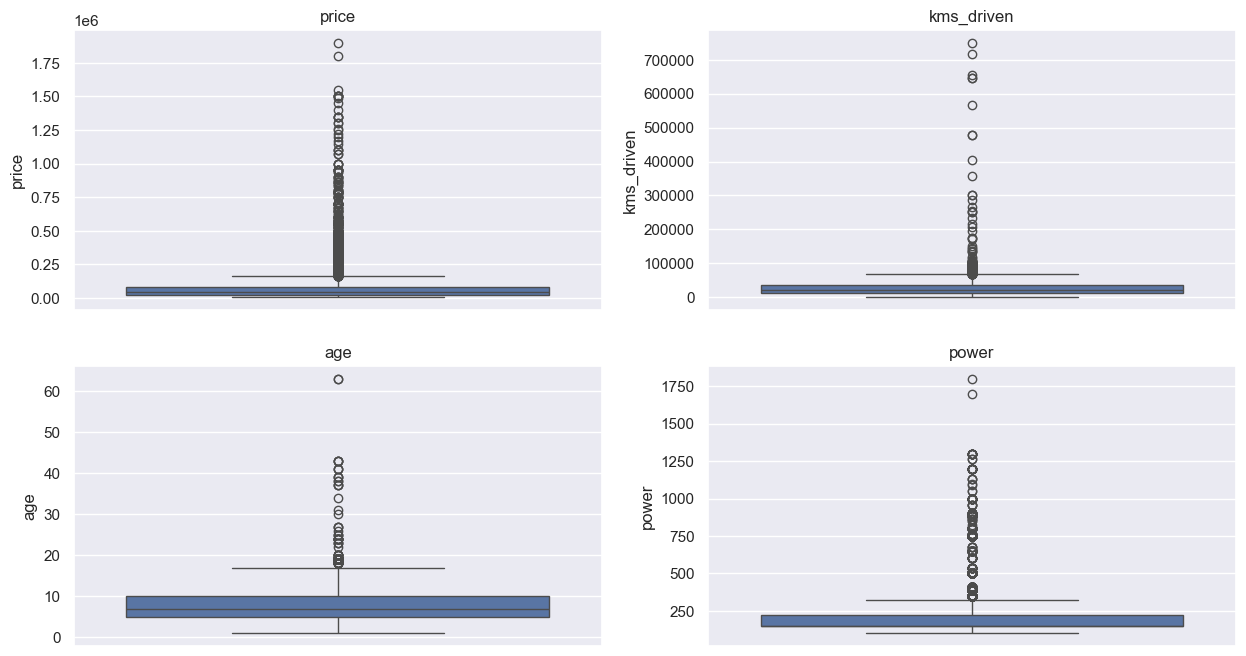

In [54]:
for i , colum in enumerate(numerical_data.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[colum])
    plt.title(colum)


## data cleaning 

In [56]:
df.dtypes

price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [57]:
df['age']=df['age'].astype(int)

In [58]:
dic={'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth Owner Or More':4}

df['owner']=df['owner'].map(dic)

In [59]:
df['owner'].value_counts()

owner
1    29964
2     2564
3      108
4       12
Name: count, dtype: int64

In [60]:
ser=df['city'].value_counts()
ser[ser>10].keys()

Index(['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Rupnagar',
       'Allahabad', 'Gurgaon', 'Godhara', 'Faridabad', 'Kadapa', 'Perumbavoor',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Tiruvallur', 'Guwahati',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Kalyan', 'Nashik', 'Ranchi',
       'Udaipur', 'Rohtak', 'Agra', 'Kota', 'Gorakhpur', '24 Pargana',
       'Ernakulam', 'Gandhinagar', 'Meerut'],
      dtype='object', name='city')

In [61]:
city_name=['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Allahabad',
       'Rupnagar', 'Gurgaon', 'Godhara', 'Faridabad', 'Perumbavoor', 'Kadapa',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Guwahati', 'Tiruvallur',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Nashik', 'Ranchi', 'Kalyan',
       'Rohtak', 'Udaipur', 'Gorakhpur', 'Agra', 'Kota', '24 Pargana',
       'Meerut', 'Gandhinagar', 'Ernakulam']
maxc_ten_bike = df[df['city'].isin(city_name)]
maxc_ten_bike.head() 
# these are all city data that having at least 10 bikes

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [62]:
maxc_ten_bike['city'].value_counts().shape[0]              # total 60 city available in my data

60

In [64]:
# Filtering Data ...
bikes_name=df['brand'].value_counts()
most_available_bikes = bikes_name[bikes_name>10].keys()
greater_than_ten_bike = maxc_ten_bike[maxc_ten_bike['brand'].isin(most_available_bikes)]
greater_than_ten_bike.head()


,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [67]:
# bike brand labeling
bike_encoding_dict={'Bajaj':3, 'Hero':16, 'Royal Enfield':1, 'Yamaha':5, 'Honda':6, 'Suzuki':7, 'TVS':8,
       'KTM':2, 'Harley-Davidson':4, 'Kawasaki':9, 'Hyosung':10, 'Benelli':11, 'Mahindra':12,
       'Triumph':13, 'Ducati':14, 'BMW':15}
greater_than_ten_bike['brand']=greater_than_ten_bike['brand'].map(bike_encoding_dict)
greater_than_ten_bike.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8
1,119900.0,Delhi,11000.0,1,4,350.0,1
2,600000.0,Delhi,110.0,1,8,675.0,13
3,65000.0,Bangalore,16329.0,1,4,180.0,8
4,80000.0,Bangalore,10000.0,1,3,150.0,5


In [70]:
df2 = greater_than_ten_bike

In [71]:
df2[df2['brand']==12].head()

,price,city,kms_driven,owner,age,power,brand
47,28000.0,Jaipur,45000.0,1,2,110.0,12
427,145000.0,Thane,16000.0,1,5,300.0,12
474,18999.0,Pune,38669.0,3,6,110.0,12
935,175000.0,Delhi,8000.0,1,3,300.0,12
946,115000.0,Gurgaon,35000.0,1,5,300.0,12


# TO check the correlation in between independent and dependent feature

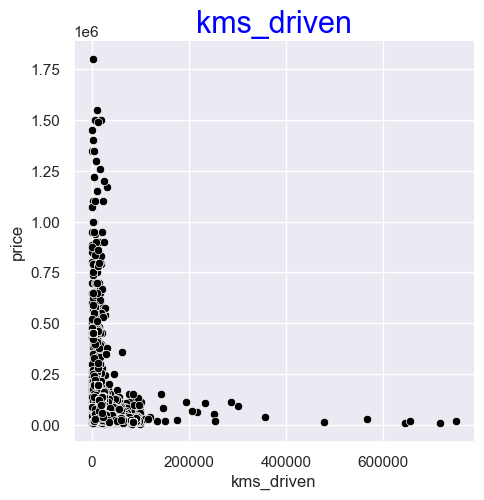

In [72]:
sns.relplot(x='kms_driven',y='price',data=df2,color='black')            #,hue='age',
plt.title('kms_driven',fontdict={'fontsize':22,'color':'blue'})
plt.show()

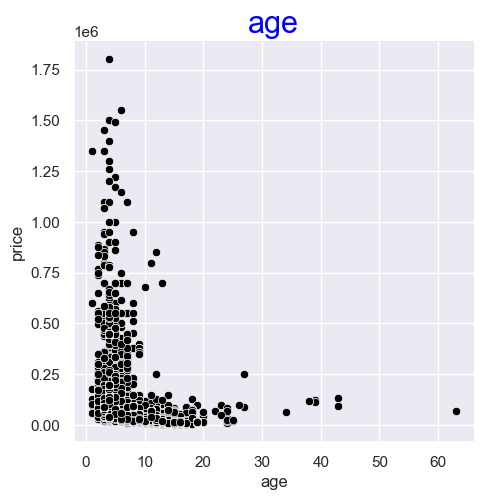

In [73]:
sns.relplot(x='age',y='price',data=df2,color='black')            
plt.title('age',fontdict={'fontsize':22,'color':'blue'})
plt.show()

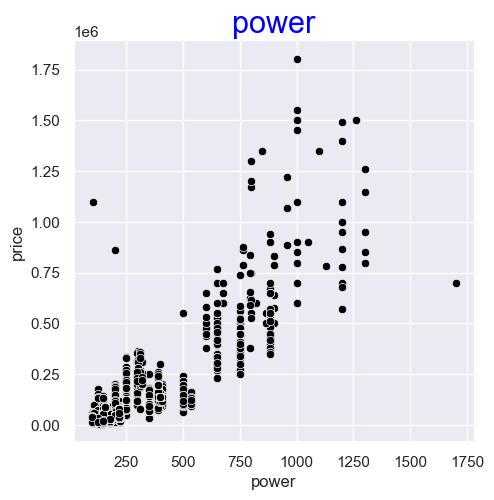

In [74]:
# positive relation
sns.relplot(x='power',y='price',data=df2,color='black')            #,hue='age',
plt.title('power',fontdict={'fontsize':22,'color':'blue'})
plt.show()

<Axes: >

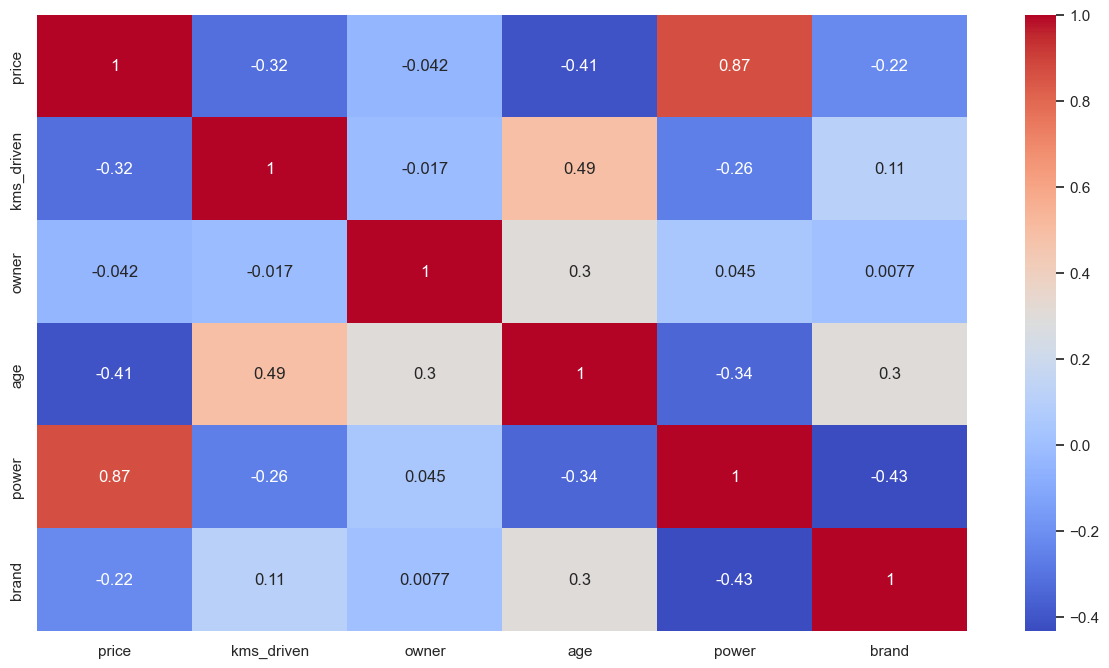

In [81]:
sns.heatmap(df2.select_dtypes(exclude='O').corr(),annot=True,cmap='coolwarm')
# checking corelation 

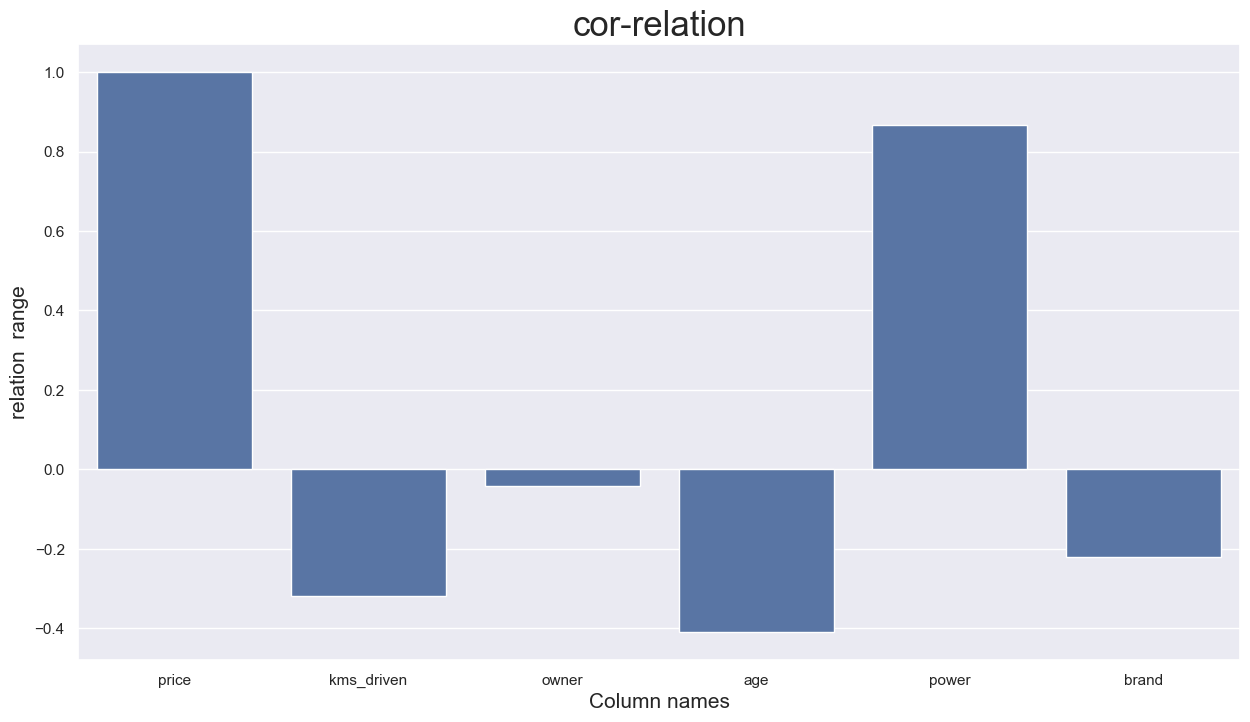

In [90]:
sns.barplot(x = df2.select_dtypes(exclude='O').corr()['price'].keys(),y=df2.select_dtypes(exclude='O').corr()['price'].values)
plt.title('cor-relation',size=25)
plt.xlabel('Column names',size=15)
plt.ylabel('relation  range',size=15)
plt.show()
# ploting the corelation

<Axes: xlabel='power', ylabel='power'>

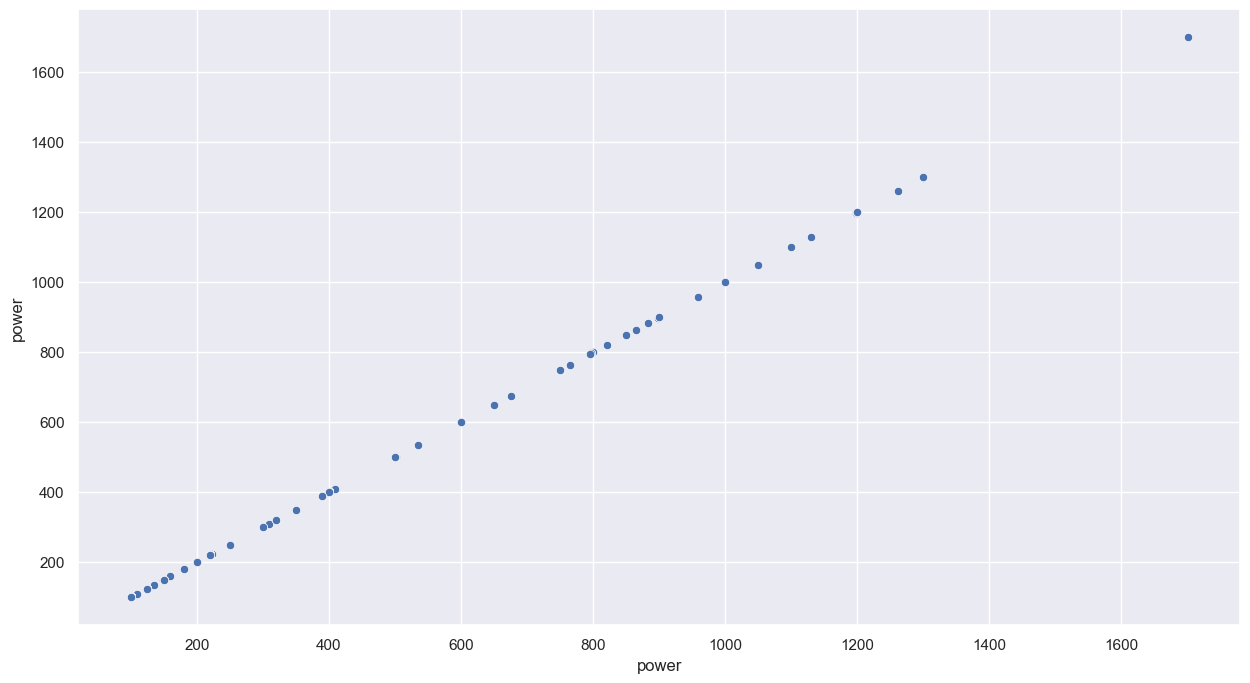

In [91]:
sns.scatterplot(x='power',y='power',data=df2)
# this is +1 relationship because, we plot relation in same columns

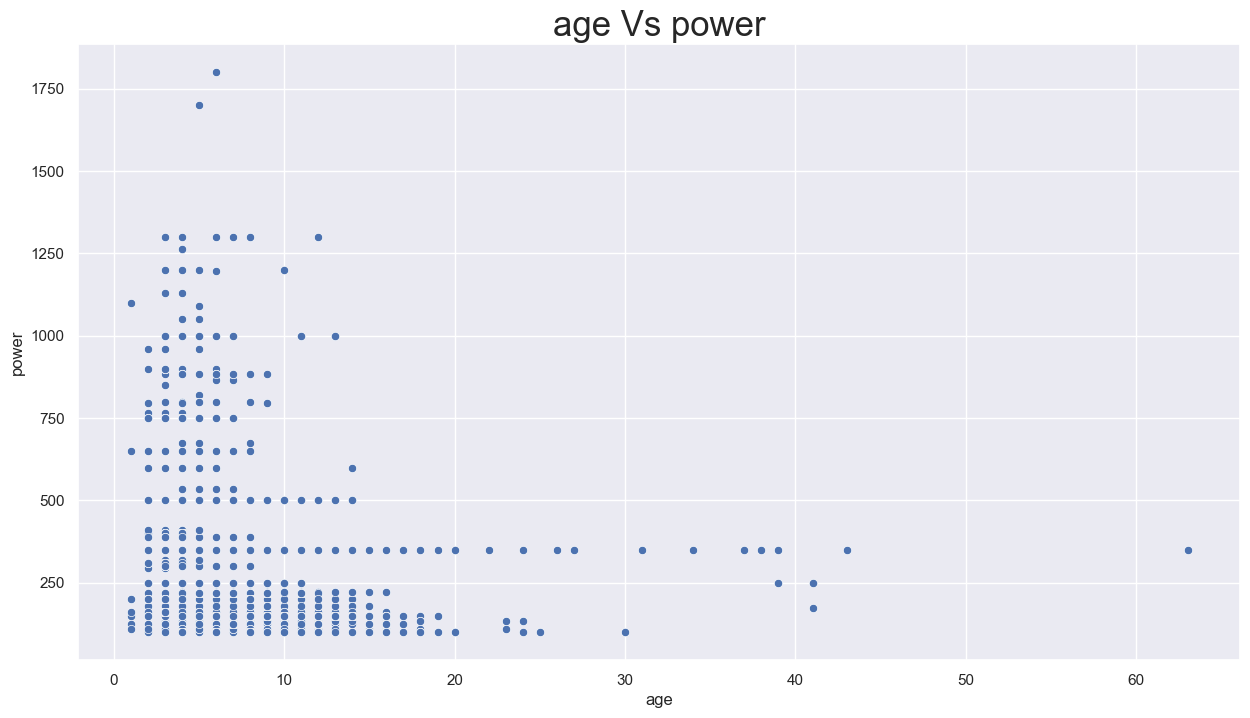

In [93]:
sns.scatterplot(x='age',y='power',data=df)
plt.title('age Vs power',size=25)
plt.show()

## to remove the outliers by IQR method

In [94]:
numerical_data = df2.select_dtypes(exclude='O')
categorical_data = df2.select_dtypes(include='O')

### formula to remove outliers from the dataset
LL=Q1−(1.5×IQR)<br>
UL=Q3+(1.5×IQR)<br>

Where:<br>
Q1 is the 25th percentile,<br>
Q3 is the 75th percentile,<br>
IQR is the interquartile range 
( Q3−Q1 ), and 1.5 <br>
1.5 is the multiplier that determines how far away from the quartiles the <br>bounds will be.

In [95]:
# from kms_driven feature
lower_limit = dict()
uper_limit = dict()

for colum in numerical_data.columns:
    q1,q3=df2[colum].quantile([.25,.75])   # 1st and 3rd quartile
    IQR=q3-q1        # calculating interquatile range
    LL=q1-(1.5*IQR)    # lower range
    UL=q3+(1.5*IQR)
    lower_limit[colum]=LL
    uper_limit[colum]=UL
    

In [96]:
lower_limit
# lower limits for all columns

{'price': -57500.0,
 'kms_driven': -22500.0,
 'owner': 1.0,
 'age': -2.5,
 'power': 45.0,
 'brand': -3.0}

In [97]:
uper_limit
# upper limits for all columns

{'price': 162500.0,
 'kms_driven': 69500.0,
 'owner': 1.0,
 'age': 17.5,
 'power': 325.0,
 'brand': 13.0}

In [124]:
print(df2.shape)
temp = 0
for lower_upper_pairs in list(zip(uper_limit.items(),lower_limit.items())):
    df2 =   df2[(df2[lower_upper_pairs[0][0]] >= lower_upper_pairs[1][1])  & (df2[lower_upper_pairs[0][0]] <= lower_upper_pairs[0][1])]
print(df2.shape)

(31679, 7)
(17725, 7)


In [131]:
df2.head(2)

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8
3,65000.0,Bangalore,16329.0,1,4,180.0,8


In [133]:
df2 = df2.drop('city',axis=1)
df2.head(2)

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3,110.0,8
3,65000.0,16329.0,1,4,180.0,8


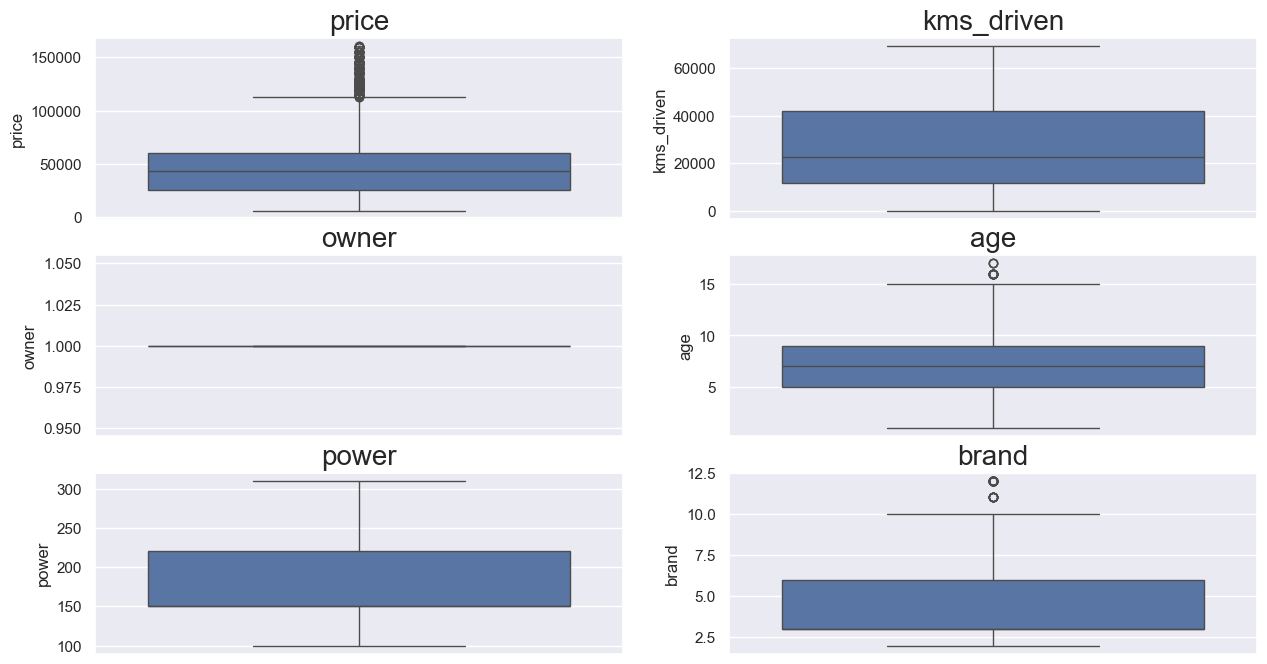

In [135]:
for plot_no , col in enumerate(df2.columns):
    plt.subplot(3,2,plot_no+1)
    sns.boxplot(df2[col])
    plt.title(col,size=20)


## Set the variable for ML model

In [136]:
x = df2.drop('price',axis=1)
y = df2[['price']]

In [137]:
x.head(2)

,kms_driven,owner,age,power,brand
0,17654.0,1,3,110.0,8
3,16329.0,1,4,180.0,8


In [138]:
y.head(2)

,price
0,35000.0
3,65000.0


In [139]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train  ,x_test,   y_train,  y_test =  train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
x_train.shape,  x_test.shape,   y_train.shape,   y_test.shape

((14180, 5), (3545, 5), (14180, 1), (3545, 1))

In [141]:
x_train

,kms_driven,owner,age,power,brand
28629,8000.0,1,5,220.0,3
6836,1300.0,1,4,160.0,3
8908,40000.0,1,9,125.0,6
13572,20000.0,1,6,100.0,3
24009,11885.0,1,12,125.0,7
...,...,...,...,...,...
21547,36000.0,1,15,150.0,3
22729,60857.0,1,13,150.0,3
11369,22697.0,1,7,125.0,7
1880,11314.0,1,4,110.0,6


In [142]:
y_train

,price
28629,70000.0
6836,89000.0
8908,34000.0
13572,23000.0
24009,35000.0
...,...
21547,14227.0
22729,22000.0
11369,32000.0
1880,35600.0


In [144]:
from sklearn.ensemble import  RandomForestRegressor
rdf = RandomForestRegressor()

In [145]:
rdf.fit(x_train,y_train)

RandomForestRegressor()

In [146]:
print("Training accuracy :- ",rdf.score(x_train,y_train))
print("Testing accuracy :- ",rdf.score(x_test,y_test))


Training accuracy :-  0.992346365038802
Testing accuracy :-  0.9580761948228886


# HYPER PARAMETER TUNING
This is for research purpose, because yet now we got it good accuracy

In [151]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rdf2 = RandomForestRegressor()

In [149]:
# Defining Parameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=500,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=3,num=6)]
min_samples_split = [20,30,50]
min_samples_leaf = [15,10,20]

In [150]:
# param grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [152]:
rdm_rand_forest = RandomizedSearchCV(estimator=rdf2,param_distributions=random_grid,n_iter=10,cv=2,verbose=2,scoring='neg_mean_squared_error')

In [154]:
rdm_rand_forest.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=50, n_estimators=427; total time=   1.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=50, n_estimators=427; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=20, min_samples_split=50, n_estimators=281; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=20, min_samples_split=50, n_estimators=281; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=318; total time=   1.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=318; total time=   1.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=30, n_estimators=245; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=30, n_estima

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 4, 4, 3, 3, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [15, 10, 20],
                                        'min_samples_split': [20, 30, 50],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [155]:
rdm_rand_forest.best_params_

{'n_estimators': 390,
 'min_samples_split': 50,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 5}

In [157]:
best_estimator = rdm_rand_forest.best_estimator_
print("Training accuracy :- ",best_estimator.score(x_train,y_train))
print("Testing accuracy :- ",best_estimator.score(x_test,y_test))
# now THe accuracy is decreased 💔 our previos model is good

Training accuracy :-  0.9081452097670721
Testing accuracy :-  0.9001376427536882


### Save th3 model

In [158]:
import joblib
joblib.dump(rdf,'updated_model.lb')
loaded_model = joblib.load('updated_model.lb')

### Prediction

In [160]:
pred = rdf.predict(x_test)

In [163]:
compare = y_test
compare['prediction'] = pred
compare.columns = ['actual','prediction']
compare.iloc[0:20]

,actual,prediction
31713,35000.0,35000.00
2447,65000.0,47389.56
10569,22000.0,22000.00
23302,20000.0,20000.00
4567,68000.0,65222.00
26678,35000.0,35000.00
14198,22000.0,22000.00
6010,28000.0,29608.20
2574,62000.0,56992.64
22005,60000.0,60000.00


In [166]:
print(rdf.score(x_train,y_train))
print(rdf.score(x_test,y_test['actual']))


0.992346365038802
0.9580761948228886


THANK YOU 🤍